In [85]:
import numpy as np
from random import random
from random import randint
from math import *
import matplotlib.pyplot as plt


'Basic parameters'

I=200 #basic parameters
n=1000
dt=0.1
tau_m=5
g_L=10
'____________________________________________________________________'
class neuron :
    def __init__(self,n,time_to_model,neuron_of_first_layer): #n is the number of neurons it is connected to
        self.membpot=100.0   
        self.input_weights=[0]*n
        self.output_weights=[0]*n #the weights the neuron gives to the neurons of next layer
        self.output_weights_values=[0]*n
        self.activity=0
        self.V_th=-65
        self.V_reset= -75
        self.tau_m= 5
        self.g_L= 10
        self.V_init= -75
        self.E_L= -75
        self.Vlist=np.zeros(time_to_model)
        self.Xlist=np.zeros(time_to_model)
        self.Vlist[0]=self.V_init #List for potential values
        self.Xlist[0]=0   #List for timeline
        self.neuron_of_first_layer=neuron_of_first_layer
        self.activity_list=[]
        self.state_list=[False]*time_to_model
  

    def update_LIF(self,t): 
        if self.neuron_of_first_layer:
            for j in range(len(self.input_weights)):
                 self.input_weights[j]=randint(-1,1)*random()
                    
        if t==0: #then we need to define the weights this neurons has with the next layer, indenpendent of t
            for i in range(len(self.output_weights)):
                self.output_weights_values[i]=randint(-1,1)*random()
            
        dV=(-(self.Vlist[t-1]-self.V_reset)+I/g_L)/tau_m
        if self.Vlist[t-1]>=self.V_th:
            self.Vlist[t]=self.V_init
            self.state_list[t]=True
#             print(f"Spiked at {t}")
        else:
            self.Vlist[t]=self.Vlist[t-1]+(dt*dV)
            
        S=0
        memb_pot=self.Vlist[t]
        for r in range(len(self.input_weights)):
            S+=memb_pot*self.input_weights[r]
        self.activity=S
        self.activity_list.append(self.activity)
        for m in range(len(self.output_weights)):
            self.output_weights[m]=self.output_weights_values[m]*self.activity
        
'_______________________________________________________________'
class layer :
    def __init__(self,n_neurons,time_to_model,first_layer):
        self.matrix=np.zeros((n_neurons,n_neurons)) #matrix of weights the layer inputs to the next one
        self.input_matrix=np.zeros((n_neurons,n_neurons))
        self.n_neurons=n_neurons
        self.Neurons_list=[]
        for i in range(self.n_neurons):
            neuron_of_first_layer=False
            if first_layer:
                neuron_of_first_layer=True
            N=neuron(self.n_neurons,time_to_model,neuron_of_first_layer)
            self.Neurons_list.append(N)
            
    def update(self,t):
        for i in range(len(self.Neurons_list)):
            N=self.Neurons_list[i]
            N.input_weights=self.input_matrix[i,:]
#             print('input weights of neuron',i,'here',N.input_weights)
            N.update_LIF(t)
            self.matrix[:,i]=N.output_weights
            self.matrix[i,i]=0

'_______________________________________________________________'
class network :
    def __init__(self,n_layers,n_neurons,time_to_model):
        self.n_layers=n_layers
        self.n_neurons=n_neurons
        self.time_to_model=time_to_model
        self.Layers_list=[]
        self.net_activity=[False]*time_to_model
        for k in range(self.n_layers):
            first_layer=False
            if k==0 :
                first_layer=True
            L=layer(self.n_neurons,time_to_model,first_layer)
            self.Layers_list.append(L)
    
    def update(self):
        for t in range(self.time_to_model):
            for k in range(len(self.Layers_list)):
                L=self.Layers_list[k]
                if k==0 : #first layer
                    L.update(t)
                else:
                    L.input_matrix=L_save.matrix #the input matrix is the output matrix of the previous one
                    L.update(t)
                L_save=L
#                 print('its layer',k,'matrix','of outputs. i.e. inputs for next layer')
#                 print(L_save.matrix)
   
    def plot_some(self,sel_layer):
        sel_layers=self.Layers_list[sel_layer]
        sel_neurons=sel_layers.Neurons_list
        for k in range(self.n_neurons):
            N=sel_neurons[k]
            N_activity=N.activity_list
            plt.plot(N_activity)
                
    def is_my_network_active(self):
        for time in range(self.time_to_model):
            lay_act=0
            for lay in range(self.n_layers):
                L=self.Layers_list[lay]
                neu_act=0
                for neu in range(self.n_neurons):
                    N=L.Neurons_list[neu]
                    if N.state_list[time]==True:
                        neu_act+=1
                if (neu_act/self.n_neurons)>0.000001 : #then more than ??% of the neurons of the layer were active at time t
                        lay_act+=1
            if (lay_act/self.n_layers)>0.5: #then more than ??% of the layers were active at time t
                    self.net_activity[time]=True #then the network is considered as active during time t

**Instruction : add state to your code**

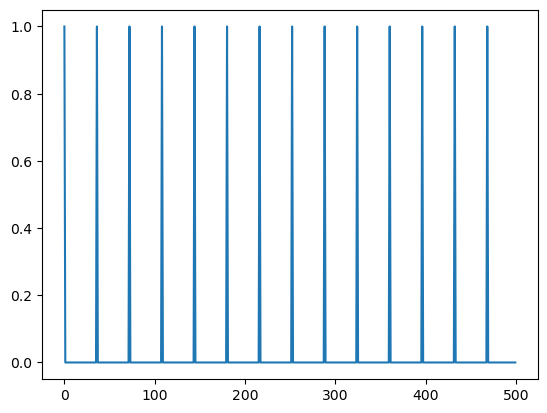

In [86]:
def main():
    time_to_model=500
    n_neurons=10
    n_layers=6
    my_network=network(n_layers,n_neurons,time_to_model)
    my_network.update()
   
    patrick=my_network.Layers_list[0].Neurons_list[0] #patrick is a neuron
    state=[]
    for i in range(time_to_model):
        if patrick.state_list[i]==True:
            state.append(1)
        else :
            state.append(0)
    plt.plot(state)         
   
main()

**Instruction : add a class experimental frame and use OO system**

In [87]:
class exp_frame:
    def __init__(self,time_to_model):
        self.activity=[]
        'Simulating activity'
        for i in range(time_to_model): 
            chose=randint(0,1)
            self.activity.append(chose==0) #activity is fulfilled with False and True 
            
        

In [88]:
def main():
    print('We want to know if our model and experimental frame have the same activity duration')
    time_to_model=500
    n_neurons=10
    n_layers=6
    my_network=network(n_layers,n_neurons,time_to_model)
    my_network.update()
    my_network.is_my_network_active()
    
    my_exp_frame=exp_frame(time_to_model)
    
    activity_of_NN=my_network.net_activity #activity of the neuron network model
    activity_of_exp_frame=my_exp_frame.activity
    
    active_together=0
    'Comparing the duration of activations'
    for time in range(time_to_model):
        if activity_of_NN[time]==activity_of_exp_frame[time]:#then the two systems were active at the same time
            active_together+=1
    if active_together/time_to_model>0.7 : #then they were synchro more than 80% of the time
        print('Answer to the research question is yes, in terms of synchro')
        
    difference_of_duration=abs(sum(activity_of_NN)-sum(activity_of_exp_frame))
    if difference_of_duration/sum(activity_of_NN)<0.2 : #then the difference is close
        print('Answer to the research question is yes, in terms of total duraction of activation during experiment')
    
    else :
        print('No, the two systems dont have the same activity duration')
        print('Duration of activity in NN was',sum(activity_of_NN))
        print('And Duration of activity for experimental frame was',sum(activity_of_exp_frame))
            
        
            
    
main()

We want to know if our model and experimental frame have the same activity duration
No, the two systems dont have the same activity duration
Duration of activity in NN was 14
And Duration of activity for experimental frame was 254
